In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

import math

from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from obspy.geodetics import locations2degrees

In [2]:
client = Client("IRIS")

In [3]:
t = UTCDateTime("2008-05-12T06:28:01")
print (t)

2008-05-12T06:28:01.000000Z


1 Event(s) in Catalog:
2008-05-12T06:27:59.980000Z | +31.064, +103.372 | 7.9 MW


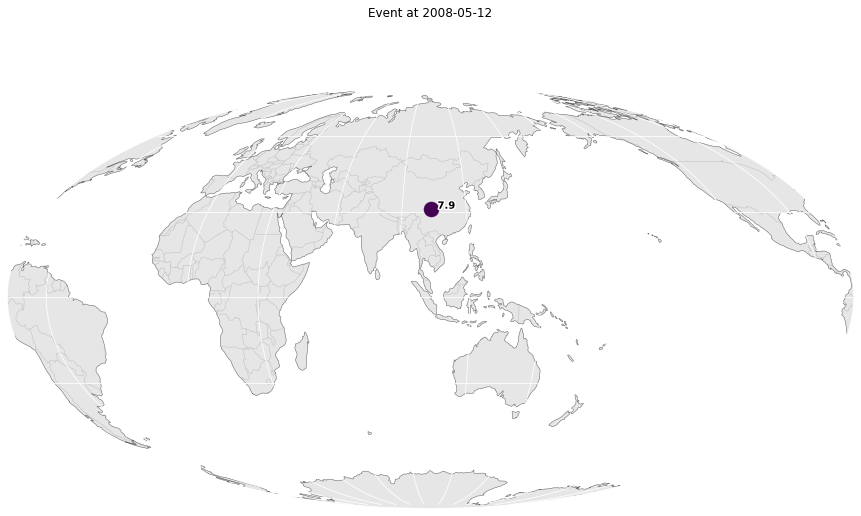

In [4]:
catalog = client.get_events(starttime=t - 100, endtime=t + 24 * 3600,
                            minmagnitude=7)
print(catalog)
catalog.plot();

Inventory created at 2021-12-30T16:39:17.559000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2008-05-12...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			IC
		Stations (3):
			IC.ENH (Enshi, Hubei Province, China)
			IC.KMI (Kunming, Yunnan Province, China)
			IC.XAN (Xi'an, China)
		Channels (0):



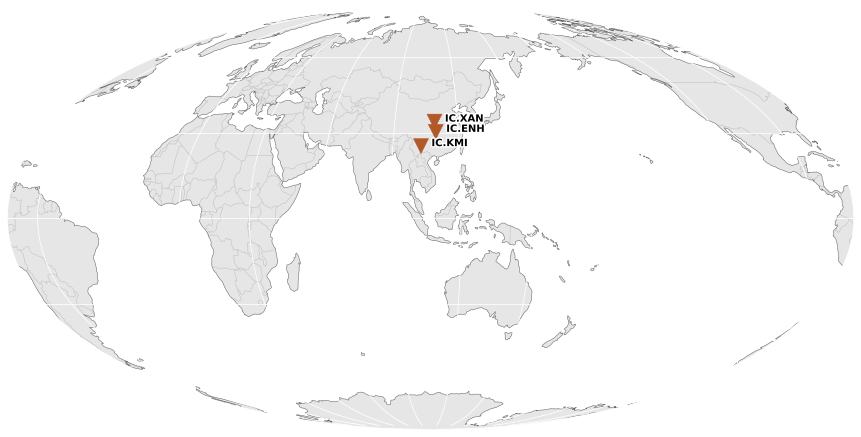

In [5]:
event = catalog[0]

origin = event.origins[0]


inventory = client.get_stations(longitude=origin.longitude, latitude=origin.latitude,

                                minradius=0, maxradius=9,

                                starttime=t, endtime =t+100,

                                channel="LHZ", matchtimeseries=True)

print(inventory)

inventory.plot();

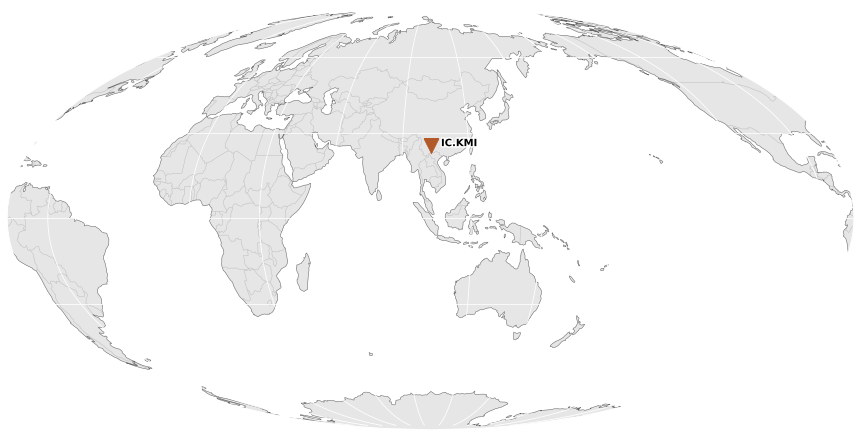

Inventory created at 2021-12-30T16:39:57.837000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2008-05-12...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			IC
		Stations (1):
			IC.KMI (Kunming, Yunnan Province, China)
		Channels (31):
			IC.KMI..BC0, IC.KMI..BC1, IC.KMI.00.BHZ, IC.KMI.00.BHN, 
			IC.KMI.00.BHE, IC.KMI.00.LHZ, IC.KMI.00.LHN, IC.KMI.00.LHE, 
			IC.KMI.00.VE1, IC.KMI.00.VHZ, IC.KMI.00.VHN, IC.KMI.00.VHE, 
			IC.KMI.00.VK1, IC.KMI.00.VMZ, IC.KMI.00.VMN, IC.KMI.00.VME, 
			IC.KMI.10.BHZ, IC.KMI.10.BHN, IC.KMI.10.BHE, IC.KMI.10.HHZ, 
			IC.KMI.10.HHN, IC.KMI.10.HHE, IC.KMI.10.LHZ, IC.KMI.10.LHN, 
			IC.KMI.10.LHE, IC.KMI.20.HNZ, IC.KMI.20.HNN, IC.KMI.20.HNE, 
			IC.KMI.20.LNZ, IC.KMI.20.LNN, IC.KMI.20.LNE


In [6]:
KMI = client.get_stations(network="IC", station="KMI", location="*", channel="*",
                     starttime=t - 60, endtime=t + 3600,
                     level="response")

KMI.plot()

print(KMI)

In [7]:
print("IC.KMI.00.VHZ")
coords1 = KMI.get_coordinates("IC.KMI.00.VHZ")
#coords2
print (coords1)

from obspy.geodetics import locations2degrees

distance = locations2degrees(origin.latitude, origin.longitude,
                             coords1["latitude"], coords1["longitude"])

print("distance épicentre-station")
print(distance,"°")

distanceKm = math.pi*6371*distance/180
print(distanceKm,"Km")


IC.KMI.00.VHZ
{'latitude': 25.1233, 'longitude': 102.74, 'elevation': 1940.0, 'local_depth': 35.0}
distance épicentre-station
5.96634721807 °
663.427541249 Km


3 Trace(s) in Stream:
IC.KMI.00.LHE | 2008-05-12T06:28:01.135507Z - 2008-05-12T06:58:00.135507Z | 1.0 Hz, 1800 samples
IC.KMI.00.LHN | 2008-05-12T06:28:01.135528Z - 2008-05-12T06:58:00.135528Z | 1.0 Hz, 1800 samples
IC.KMI.00.LHZ | 2008-05-12T06:28:01.135504Z - 2008-05-12T06:58:00.135504Z | 1.0 Hz, 1800 samples


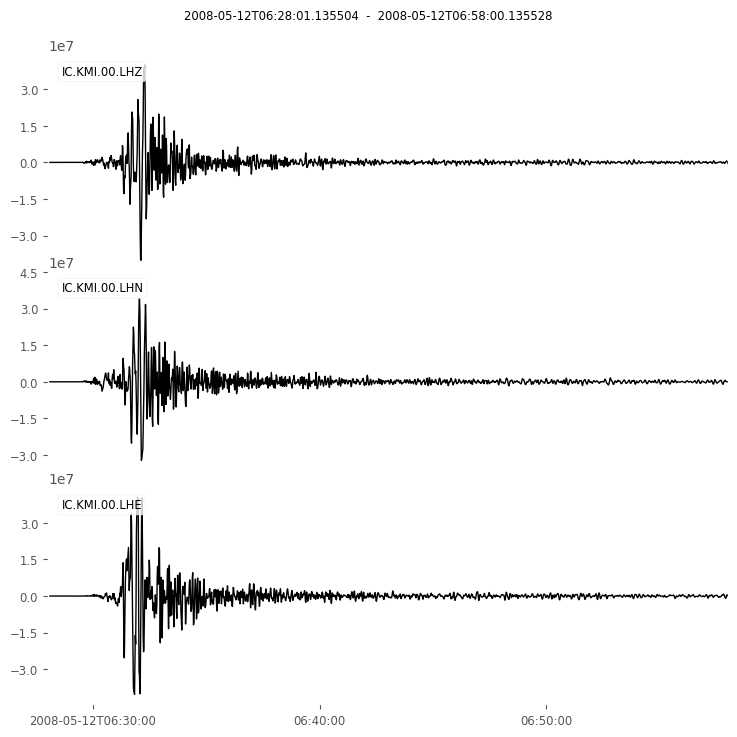

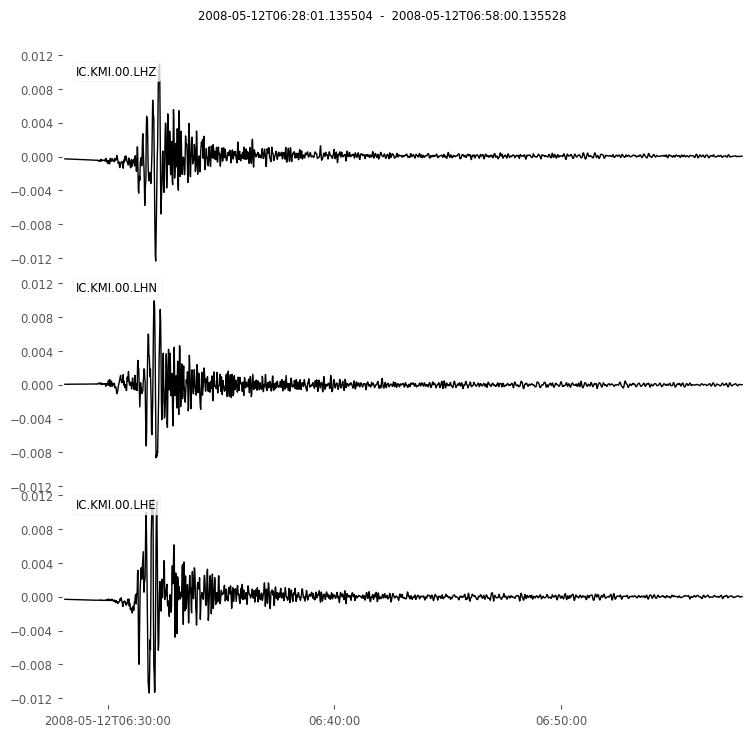

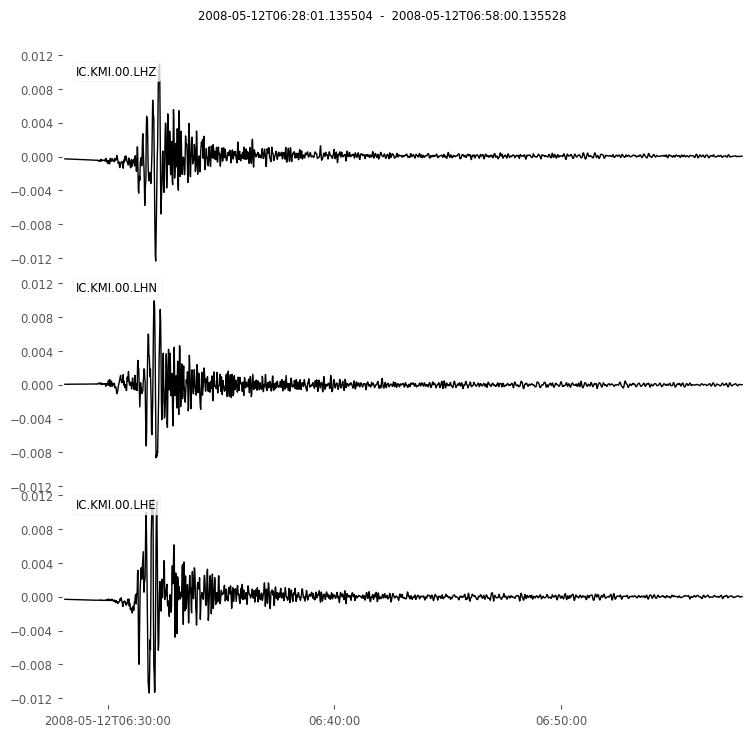

In [8]:
st = client.get_waveforms("IC", "KMI", "00", "LH?",
                                       t , t + 30 * 60, attach_response=True)

print(st)
st.plot()

st.remove_response(water_level=20)
st.plot()

1 Trace(s) in Stream:
IC.KMI.10.LHZ | 2008-05-12T06:28:01.135530Z - 2008-05-27T06:28:00.135530Z | 1.0 Hz, 1296000 samples


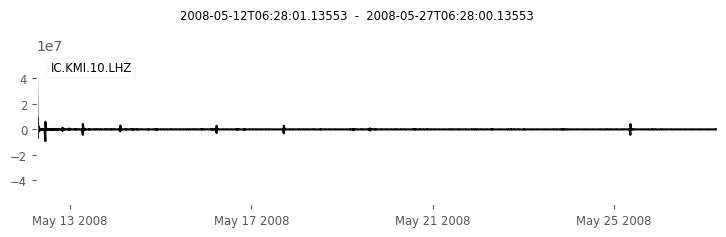

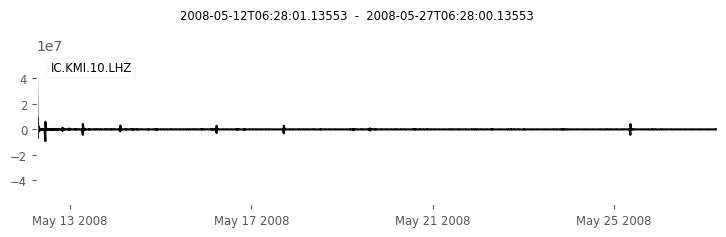

In [13]:
st = client.get_waveforms("IC", "KMI", "10", "LHZ", t, t+ 15 * 24*60*60)

print(st)
st.plot()


<ipython-input-15-1a054bc76cc9>:9: ObsPyDeprecationWarning: The plot() function is deprecated. Please use arrivals.plot_rays()
  arrivals.plot();


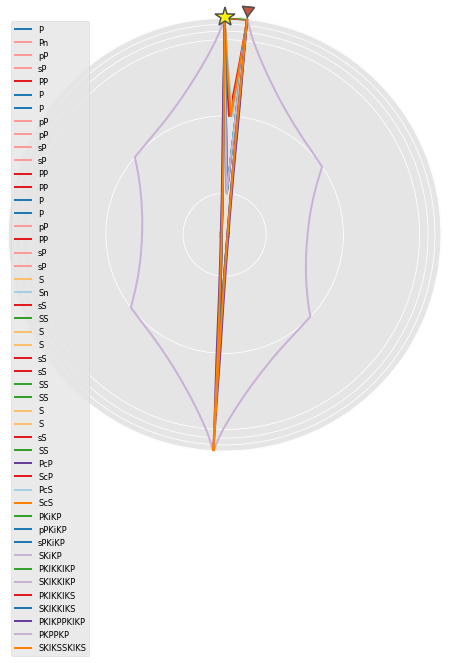

48 arrivals
	P phase arrival at 88.638 seconds
	Pn phase arrival at 88.669 seconds
	pP phase arrival at 90.465 seconds
	sP phase arrival at 91.537 seconds
	PP phase arrival at 96.183 seconds
	P phase arrival at 104.246 seconds
	P phase arrival at 104.279 seconds
	pP phase arrival at 105.446 seconds
	pP phase arrival at 105.486 seconds
	sP phase arrival at 106.708 seconds
	sP phase arrival at 106.746 seconds
	PP phase arrival at 107.407 seconds
	PP phase arrival at 107.846 seconds
	P phase arrival at 114.272 seconds
	P phase arrival at 114.299 seconds
	pP phase arrival at 114.507 seconds
	PP phase arrival at 114.869 seconds
	sP phase arrival at 116.096 seconds
	sP phase arrival at 116.165 seconds
	S phase arrival at 157.175 seconds
	Sn phase arrival at 157.252 seconds
	sS phase arrival at 159.993 seconds
	SS phase arrival at 168.625 seconds
	S phase arrival at 175.851 seconds
	S phase arrival at 175.907 seconds
	sS phase arrival at 177.806 seconds
	sS phase arrival at 177.876 seconds
	S

In [15]:
from obspy.taup import TauPyModel

m = TauPyModel(model="ak135")

arrivals = m.get_ray_paths(
    distance_in_degree=distance,
    source_depth_in_km=origin.depth / 1000.0)

arrivals.plot();

print(arrivals)


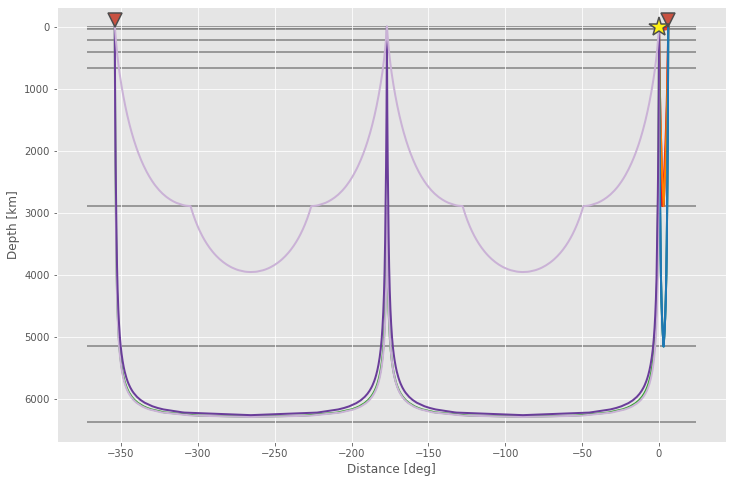

In [16]:
arrivals = m.get_ray_paths(source_depth_in_km=origin.depth / 1000.0,

                               distance_in_degree=distance,

                               phase_list=["ttbasic"])

ax = arrivals.plot_rays(plot_type="cartesian")

In [19]:
st = client.get_waveforms("IC", "KMI", "00", "LH?",
                                       t , t + 30 * 60, attach_response=True)

In [21]:
first_arrival = origin.time + arrivals[0].time
print(origin.time)
print(first_arrival)
print(arrivals[0])
t2 = origin.time
t3 = t2+88.638
print(t3)

2008-05-12T06:27:59.980000Z
2008-05-12T06:29:28.618133Z
P phase arrival at 88.638 seconds
2008-05-12T06:29:28.618000Z


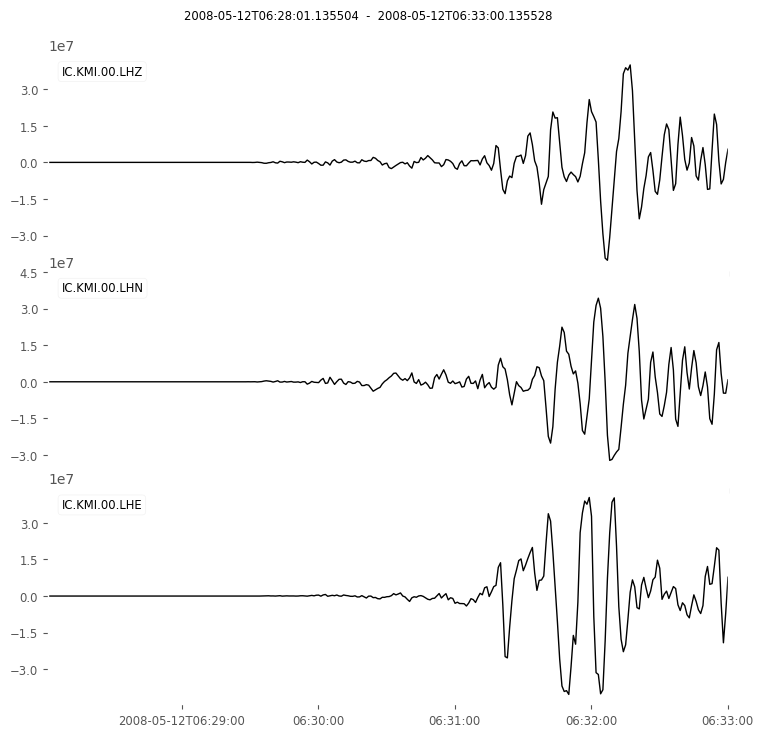

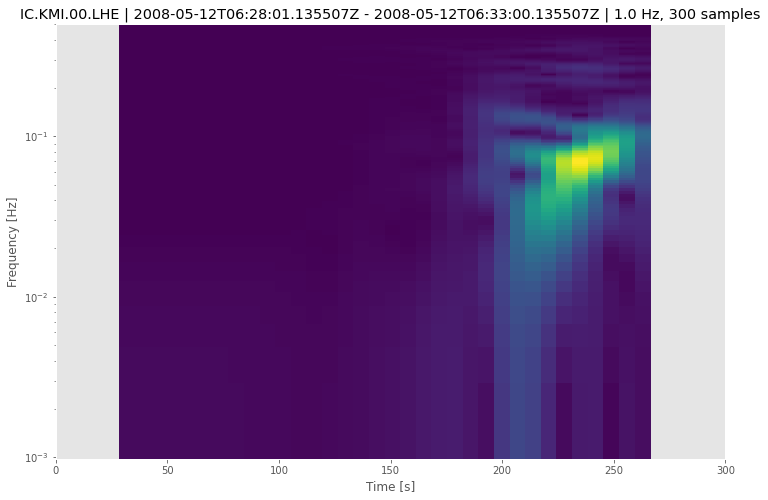

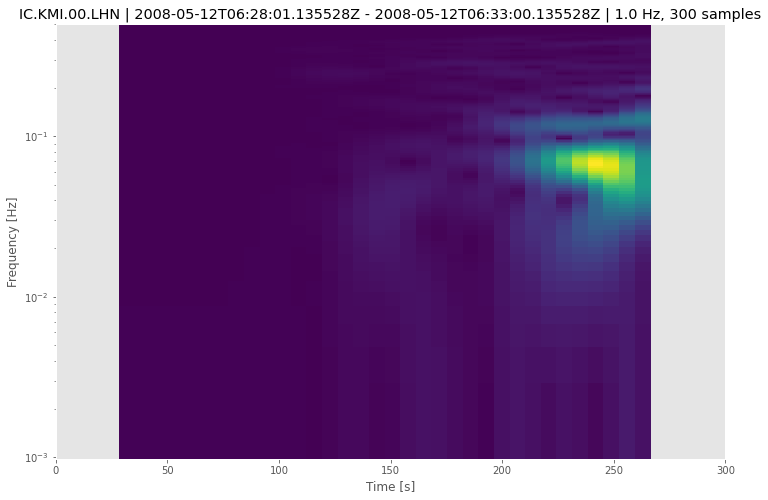

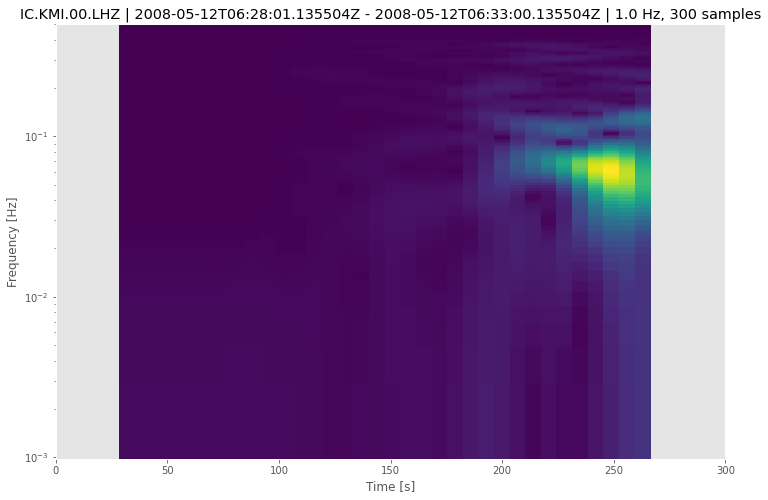

In [22]:
st.trim(first_arrival -88.638 , first_arrival + 300 - 88.638)
st.plot();

st.spectrogram(log=True, wlen=50);

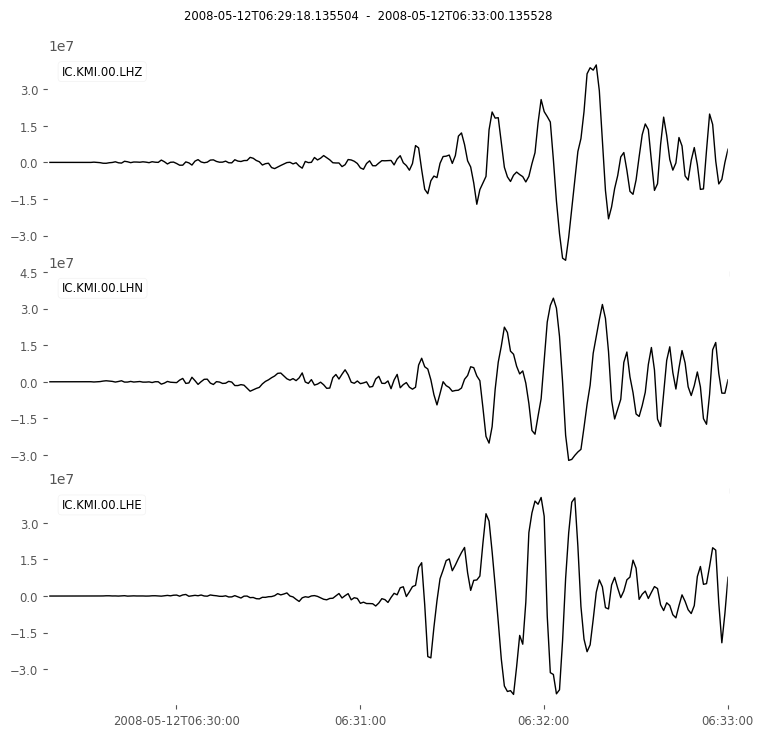

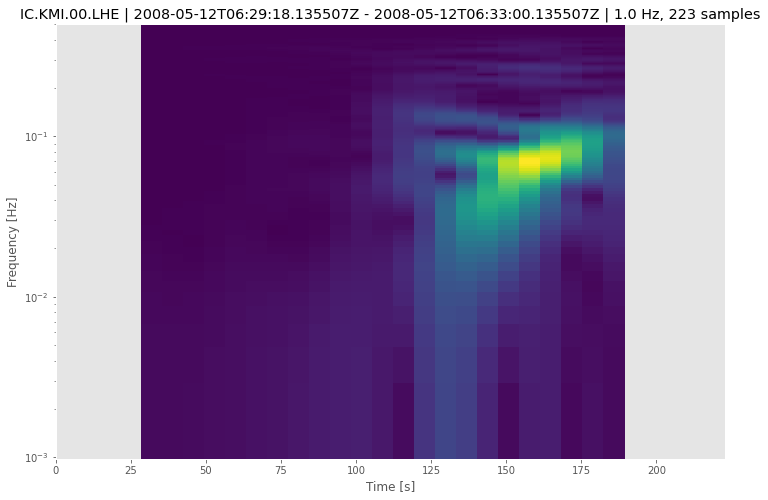

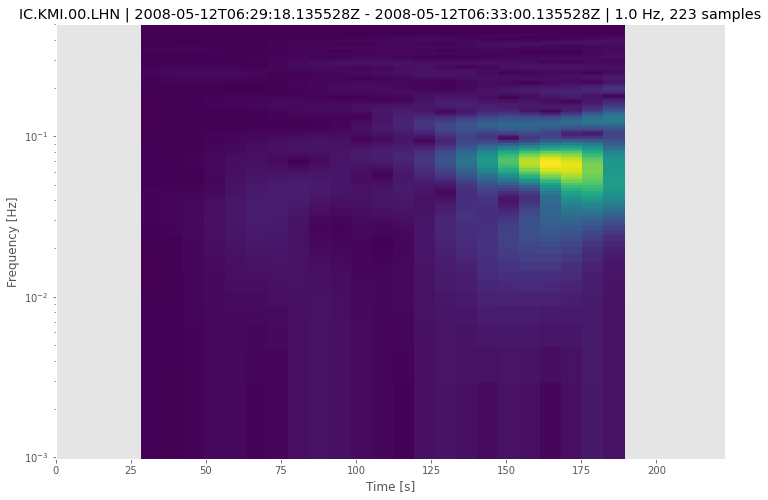

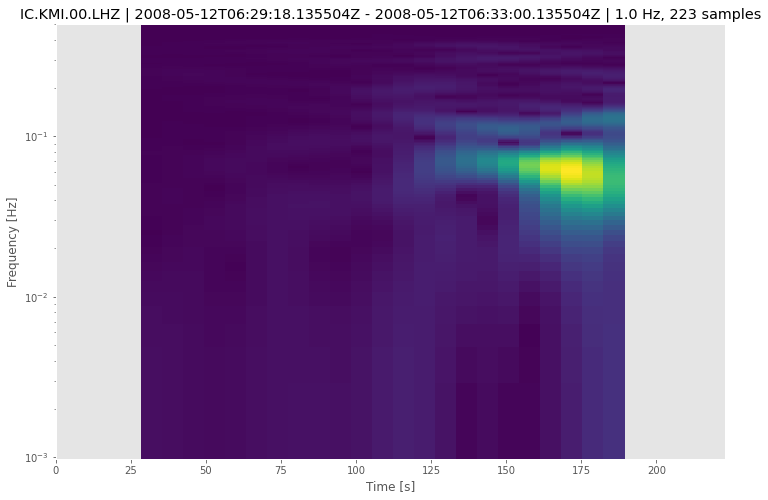

In [23]:
st.trim(first_arrival -10 , first_arrival + 300)
st.plot();

st.spectrogram(log=True, wlen=50);

In [26]:
#Recherche de la seconde station (Station Belge)

Inventory created at 2021-12-30T17:12:46.206000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2008-05-12...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (36):
			5A, AF, BE, BK, CZ, G, GE, IC, II, IU, KN, LB, LI, MN, MY, NN, NZ, 
			PB, PM, PS, TA, TW, US, XA, XC, XQ, XS, XZ, Y2, YC, YU, YV, YW, ZE
			ZG, ZP
		Stations (744):
			5A.LEOS (LEOS)
			5A.NOAA (NOAA)
			5A.SAVE (SAVE)
			5A.SAVW (SAVW)
			AF.WIN (Windhoek, Namibia)
			BE.MEM (Membach, Belgium)
			BK.CMB (Columbia College, Columbia, CA, USA)
			BK.HUMO (Hull Mountain, OR, USA)
			BK.MCCM (Marconi Conference Center, Marshall, CA, USA)
			BK.WDC (Whiskeytown Dam, Whiskeytown, CA, USA)
			CZ.DPC (Dobruska/Polom)
			G.AIS (Nouvelle-Amsterdam - TAAF, France)
			G.CAN (Canberra, Australia)
			G.CRZF (Port Alfred - Ile de la Possession - Crozet Islands, France)
			G.ECH (Echery - Sainte Marie aux Mines, France)
			G.INU (Inuyama, Jap

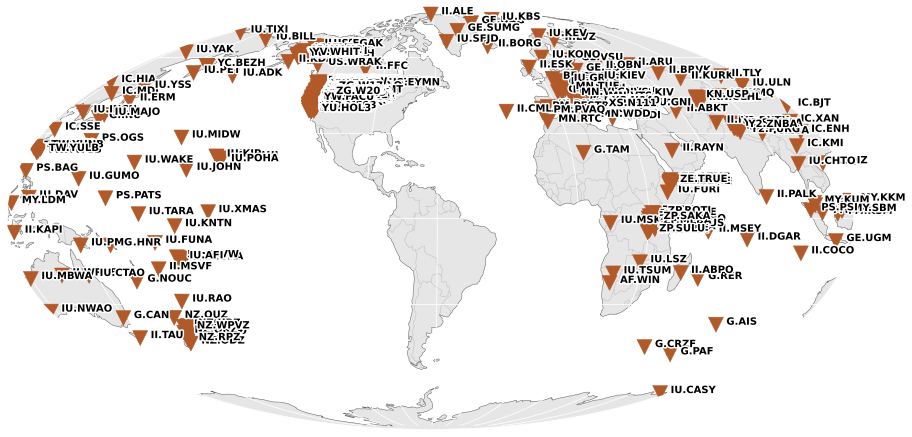

In [27]:
inv2 = client.get_stations(longitude=origin.longitude, latitude=origin.latitude,

                                minradius=0, maxradius=100,

                                starttime=t, endtime =t+100,

                                channel="LHZ", matchtimeseries=True)

print(inv2)

inv2.plot();

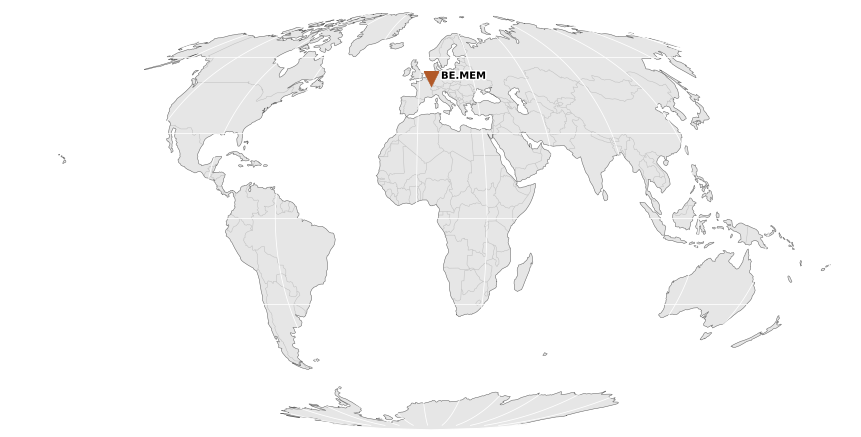

Inventory created at 2021-12-30T17:13:28.873000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2008-05-12...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			BE
		Stations (1):
			BE.MEM (Membach, Belgium)
		Channels (12):
			BE.MEM..HHZ, BE.MEM..HHN, BE.MEM..HHE, BE.MEM..LCE, BE.MEM..LCQ, 
			BE.MEM..LHZ, BE.MEM..LHN, BE.MEM..LHE, BE.MEM..VEA, BE.MEM..VEC, 
			BE.MEM..VEP, BE.MEM..VKI
BE.MEM..LHZ
{'latitude': 50.608691, 'longitude': 6.009614, 'elevation': 244.3, 'local_depth': 0.0}
distance épicentre-station
70.7850201462 °
7870.93512269 Km


In [28]:
MEM = client.get_stations(network="BE", station="MEM", location="*", channel="*",
                     starttime=t - 60, endtime=t + 3600,
                     level="response")

MEM.plot()

print(MEM)

print("BE.MEM..LHZ")
coordsBE = MEM.get_coordinates("BE.MEM..LHZ")
#coords2
print (coordsBE)

from obspy.geodetics import locations2degrees

distance = locations2degrees(origin.latitude, origin.longitude,
                             coordsBE["latitude"], coordsBE["longitude"])

print("distance épicentre-station")
print(distance,"°")

distanceKm = math.pi*6371*distance/180
print(distanceKm,"Km")


12 Trace(s) in Stream:
BE.MEM..HHE | 2008-05-12T06:28:01.008392Z - 2008-05-12T07:28:00.998392Z | 100.0 Hz, 360000 samples
BE.MEM..HHN | 2008-05-12T06:28:01.008392Z - 2008-05-12T07:28:00.998392Z | 100.0 Hz, 360000 samples
BE.MEM..HHZ | 2008-05-12T06:28:01.008392Z - 2008-05-12T07:28:00.998392Z | 100.0 Hz, 360000 samples
BE.MEM..LCE | 2008-05-12T06:28:01.000000Z - 2008-05-12T07:28:00.000000Z | 1.0 Hz, 3600 samples
BE.MEM..LCQ | 2008-05-12T06:28:01.000000Z - 2008-05-12T07:28:00.000000Z | 1.0 Hz, 3600 samples
BE.MEM..LHE | 2008-05-12T06:28:01.069537Z - 2008-05-12T07:28:00.069537Z | 1.0 Hz, 3600 samples
BE.MEM..LHN | 2008-05-12T06:28:01.069537Z - 2008-05-12T07:28:00.069537Z | 1.0 Hz, 3600 samples
BE.MEM..LHZ | 2008-05-12T06:28:01.069537Z - 2008-05-12T07:28:00.069537Z | 1.0 Hz, 3600 samples
BE.MEM..VEA | 2008-05-12T06:28:08.000000Z - 2008-05-12T07:27:58.000000Z | 0.1 Hz, 360 samples
BE.MEM..VEC | 2008-05-12T06:28:08.000000Z - 2008-05-12T07:27:58.000000Z | 0.1 Hz, 360 samples
BE.MEM..VEP | 200

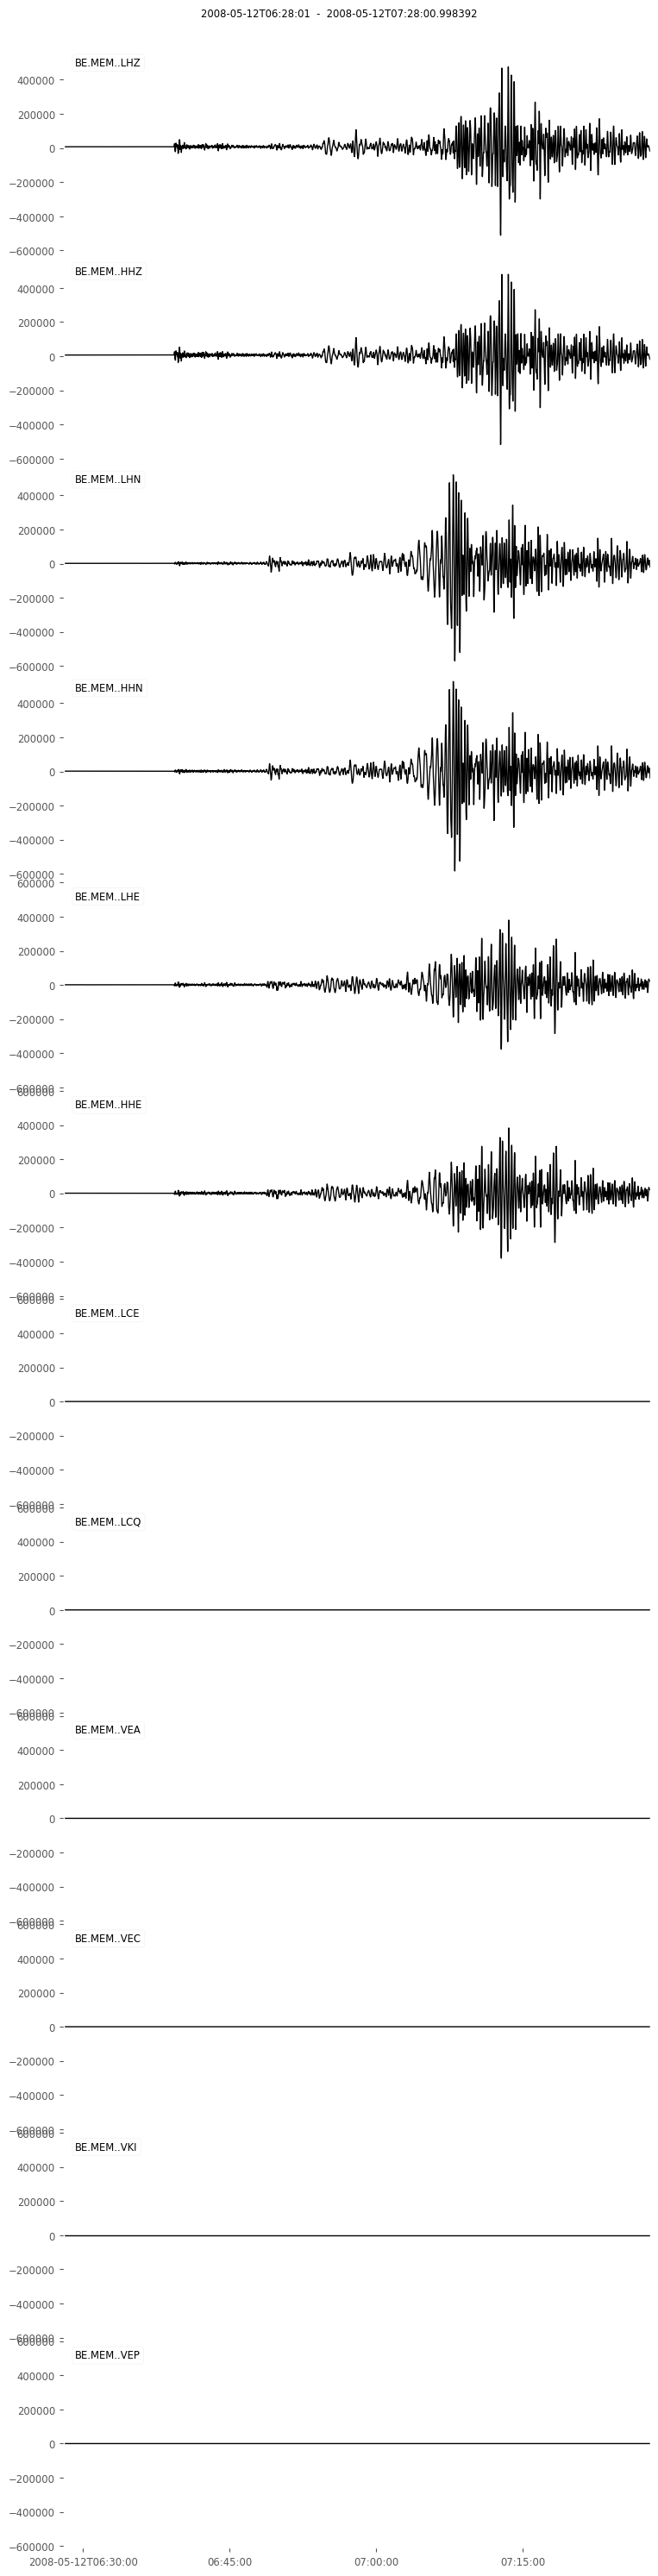

C:\Users\pcuser\anaconda3\lib\site-packages\obspy\core\inventory\response.py:1193: UserWarning: The unit 'S' is not known to ObsPy. It will be assumed to be displacement for the calculations. This mostly does the right thing but please proceed with caution.
  warnings.warn(msg)
C:\Users\pcuser\anaconda3\lib\site-packages\obspy\core\inventory\response.py:1193: UserWarning: The unit 'PERCENT' is not known to ObsPy. It will be assumed to be displacement for the calculations. This mostly does the right thing but please proceed with caution.
  warnings.warn(msg)
C:\Users\pcuser\anaconda3\lib\site-packages\obspy\core\inventory\response.py:1193: UserWarning: The unit 'A' is not known to ObsPy. It will be assumed to be displacement for the calculations. This mostly does the right thing but please proceed with caution.
  warnings.warn(msg)
C:\Users\pcuser\anaconda3\lib\site-packages\obspy\core\inventory\response.py:1193: UserWarning: The unit 'CELSIUS' is not known to ObsPy. It will be assumed 

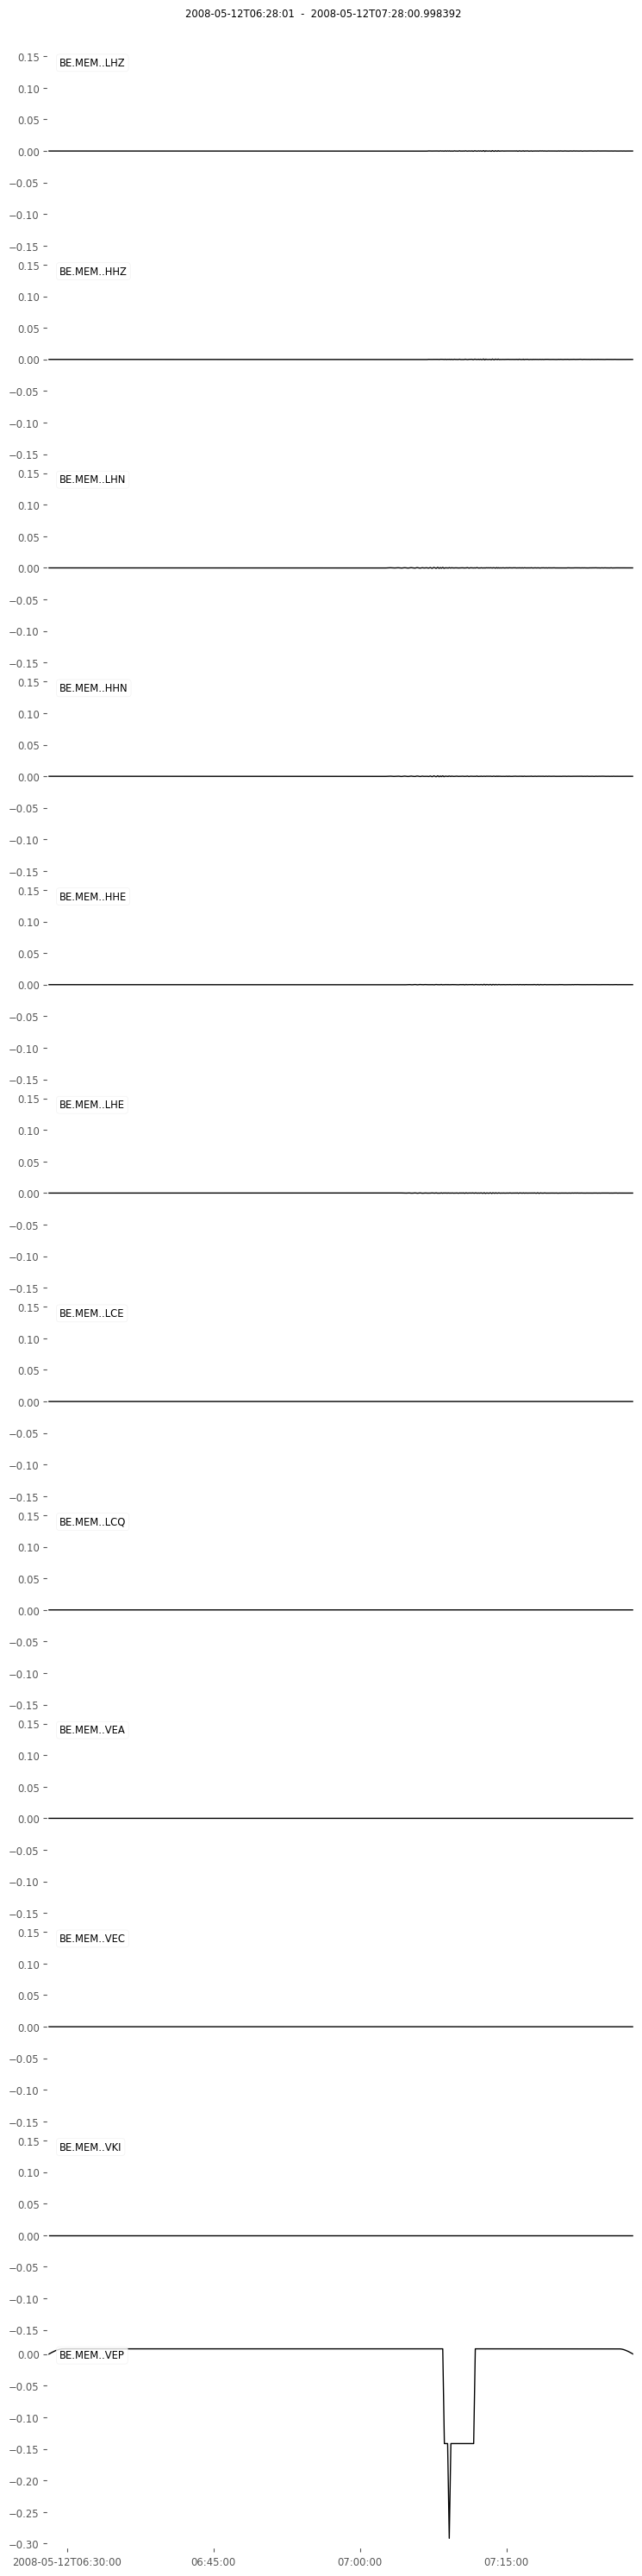

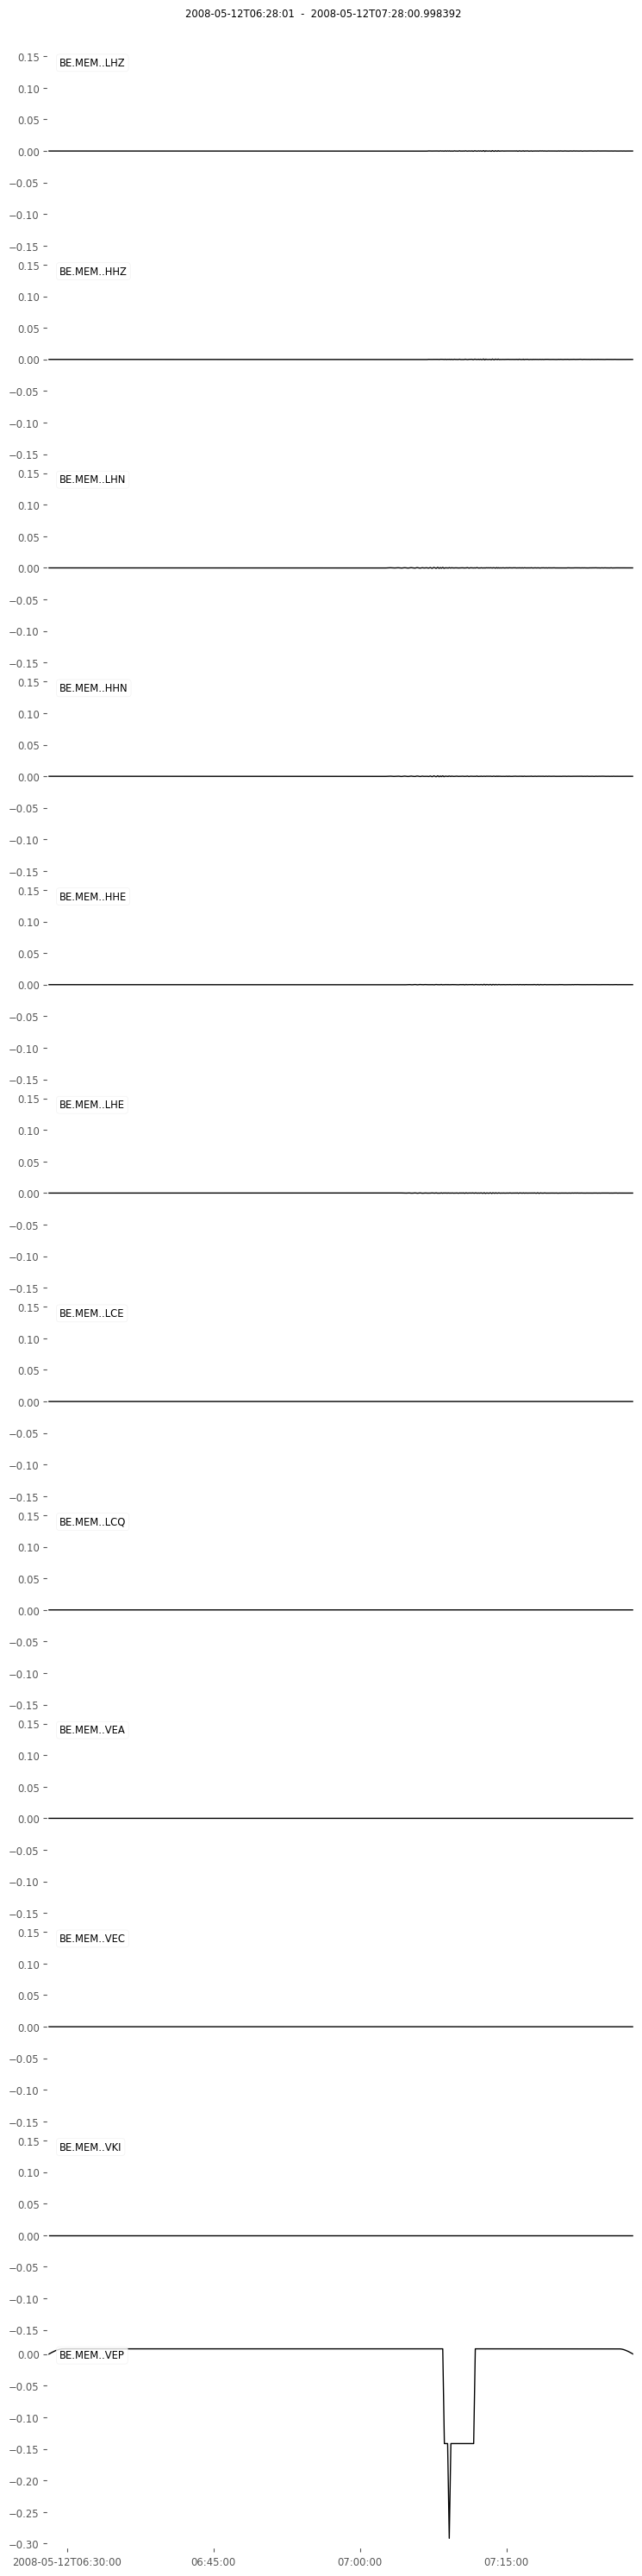

In [31]:
st = client.get_waveforms("BE", "MEM", "*", "*",
                                       t , t + 60 * 60, attach_response=True)

print(st)
st.plot()

st.remove_response(water_level=20)
st.plot()

3 Trace(s) in Stream:
BE.MEM..HHE | 2008-05-12T06:28:01.008392Z - 2008-05-12T07:28:00.998392Z | 100.0 Hz, 360000 samples
BE.MEM..HHN | 2008-05-12T06:28:01.008392Z - 2008-05-12T07:28:00.998392Z | 100.0 Hz, 360000 samples
BE.MEM..HHZ | 2008-05-12T06:28:01.008392Z - 2008-05-12T07:28:00.998392Z | 100.0 Hz, 360000 samples


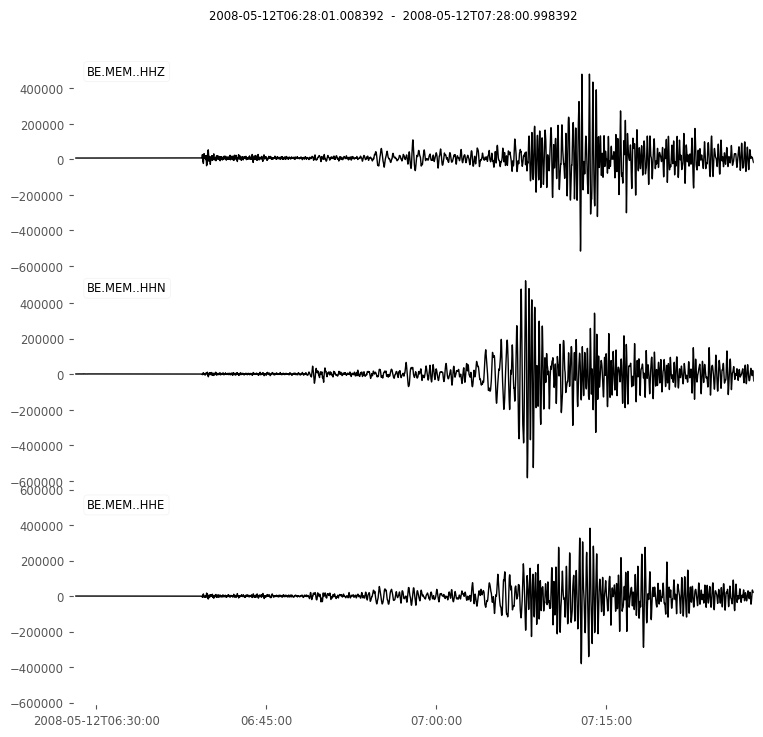

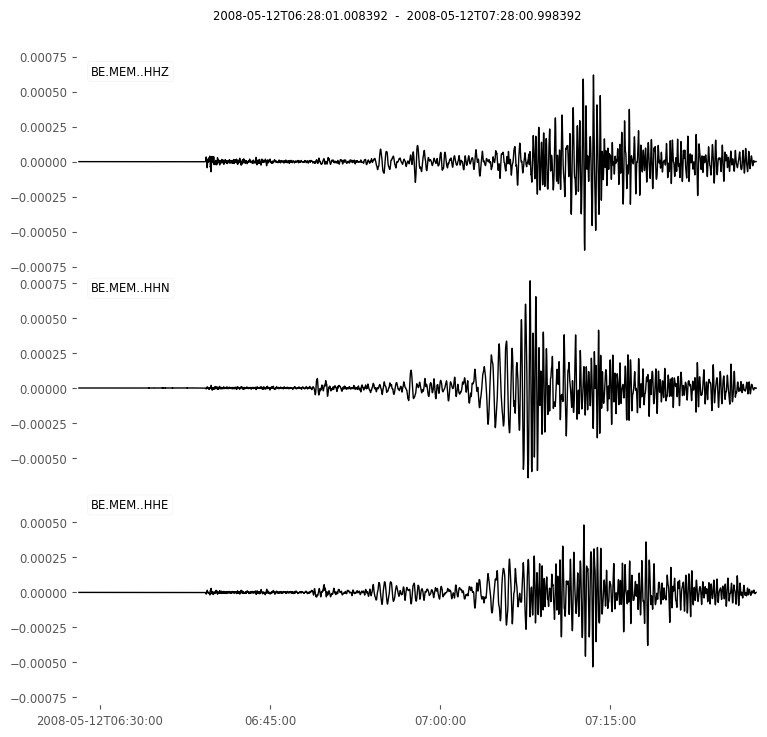

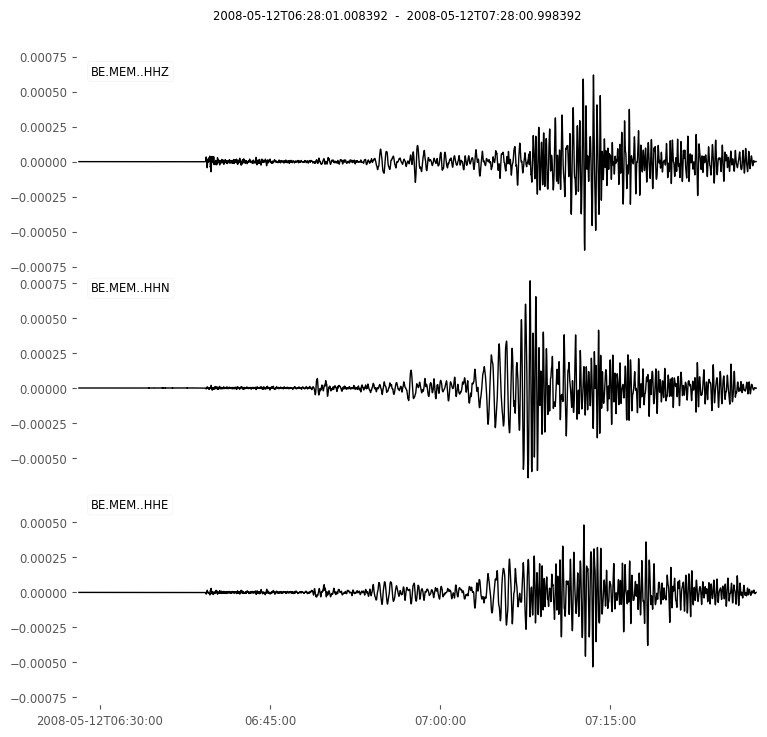

In [32]:
st = client.get_waveforms("BE", "MEM", "*", "HH*",
                                       t , t + 60 * 60, attach_response=True)

print(st)
st.plot()

st.remove_response(water_level=5)
st.plot()

<ipython-input-33-1a054bc76cc9>:9: ObsPyDeprecationWarning: The plot() function is deprecated. Please use arrivals.plot_rays()
  arrivals.plot();


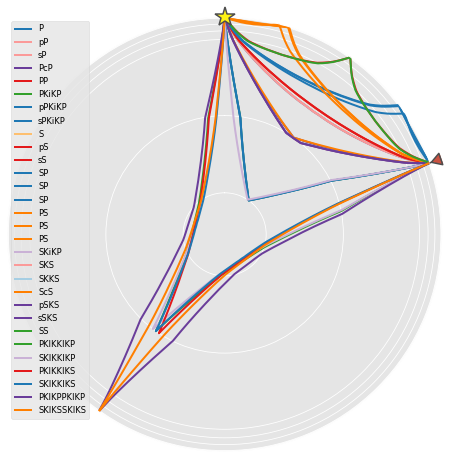

30 arrivals
	P phase arrival at 676.938 seconds
	pP phase arrival at 679.423 seconds
	sP phase arrival at 680.338 seconds
	PcP phase arrival at 697.692 seconds
	PP phase arrival at 833.695 seconds
	PKiKP phase arrival at 1046.456 seconds
	pPKiKP phase arrival at 1049.070 seconds
	sPKiKP phase arrival at 1049.957 seconds
	S phase arrival at 1231.986 seconds
	pS phase arrival at 1235.074 seconds
	sS phase arrival at 1236.080 seconds
	SP phase arrival at 1257.955 seconds
	SP phase arrival at 1258.234 seconds
	SP phase arrival at 1258.262 seconds
	PS phase arrival at 1259.011 seconds
	PS phase arrival at 1259.300 seconds
	PS phase arrival at 1259.326 seconds
	SKiKP phase arrival at 1260.166 seconds
	SKS phase arrival at 1279.569 seconds
	SKKS phase arrival at 1279.644 seconds
	ScS phase arrival at 1280.977 seconds
	pSKS phase arrival at 1282.908 seconds
	sSKS phase arrival at 1283.839 seconds
	SS phase arrival at 1504.060 seconds
	PKIKKIKP phase arrival at 1857.752 seconds
	SKIKKIKP phase 

In [33]:
from obspy.taup import TauPyModel

m = TauPyModel(model="ak135")

arrivals = m.get_ray_paths(
    distance_in_degree=distance,
    source_depth_in_km=origin.depth / 1000.0)

arrivals.plot();

print(arrivals)
